In [1139]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import time

In [2]:
#load data set
DSrev = pd.read_csv("DS-revenu.csv")
DSvol = pd.read_csv("DS-volume.csv")
DSstock = pd.read_csv("DS-stock.csv")

In [3]:
DSrev.head()

,Unnamed: 0,ds,y
0,0,2014-01-01,83159.0
1,1,2014-01-02,334180.0
2,2,2014-01-03,223296.0
3,3,2014-01-04,624192.0
4,4,2014-01-05,340594.0


In [4]:
DSvol.head()

,ds,y
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [5]:
DSstock.head()

,date,close,volume,open,high,low
0,2017/09/19,76.32,879382.0,75.28,76.44,75.27
1,2017/09/18,75.09,973816.0,74.81,75.28,74.61
2,2017/09/15,74.75,1417068.0,74.73,75.20,74.41
3,2017/09/14,74.70,1198266.0,74.34,74.74,74.30
4,2017/09/13,74.74,645010.0,74.91,75.09,74.50


In [6]:
def build_indexed_ts(frame, date_label, value_label):
    ts = pd.DataFrame()
    
    frame.reset_index(inplace=True)
    
    ts['ds'] = pd.to_datetime(frame[date_label])
    ts['y'] = pd.to_numeric(frame[value_label])
   
    ts.set_index('ds', inplace=True)
    ts.sort_index(inplace=True)
    
    return ts

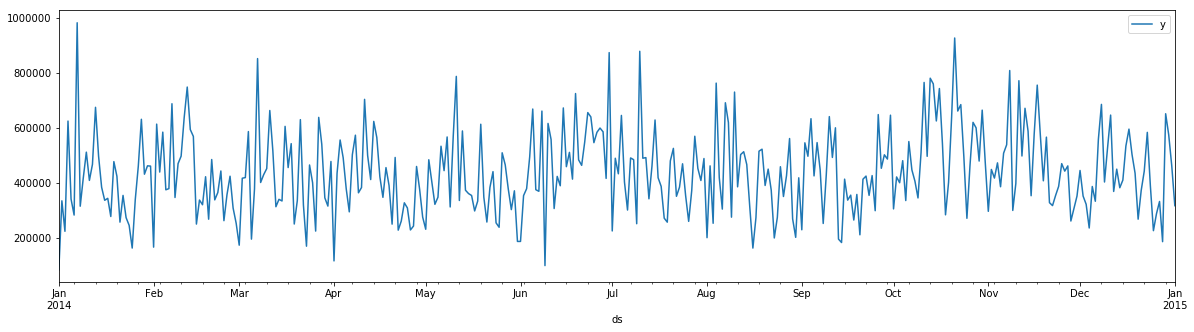

In [8]:
TSrev = build_indexed_ts(DSrev, 'ds', 'y')
TSrev.plot(figsize=(20,5))

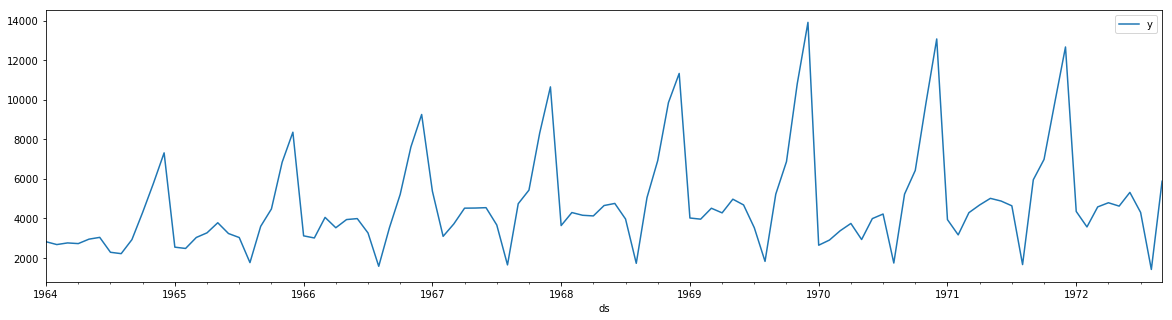

In [9]:
TSvol = build_indexed_ts(DSvol, 'ds', 'y')
TSvol.plot(figsize=(20,5))

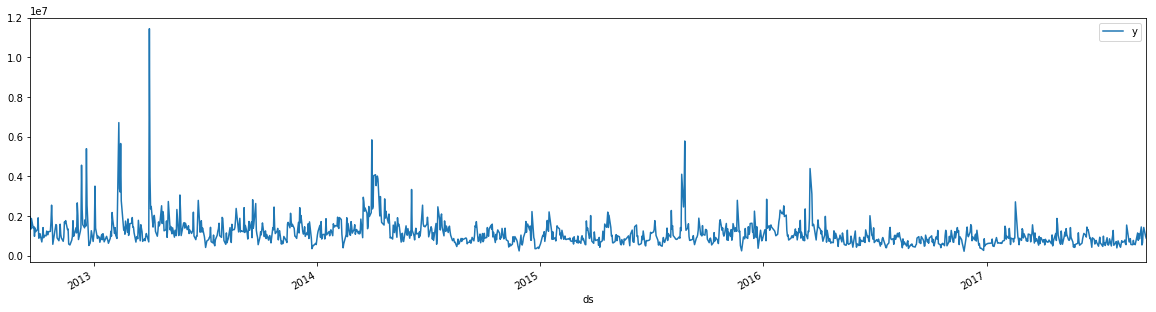

In [10]:
TSstock = build_indexed_ts(DSstock, 'date', 'volume')
TSstock.plot(figsize=(20,5))

In [797]:
#Test de stationnarity

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    
    #Rolling stat
    rolmean = timeseries.rolling(window=5,center=False).mean()
    rolstd = timeseries.rolling(window=5,center=False).std()
    trend = get_trend(timeseries)
    
    
    
        
    #Plot rolling stat
    plt.figure(1, figsize=(20, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    trd = plt.plot(trend, color='green', label = 'Trend')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation & Trend')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
#trend

def get_trend(series):
    # fit linear model
    X = [i for i in range(0, len(series))]
    X = np.reshape(X, (len(X), 1))
    y = series.values
    model = LinearRegression()
    model.fit(X, y)
    # calculate trend
    trend = model.predict(X)
    return trend
    
#autocorr

def autoCorrPlot(series, serie_name):
    
    centralized_ts = series-np.mean(series)
    tf = np.fft.fft(centralized_ts)
    spectral_density = np.array([np.real(v)**2+np.imag(v)**2 for v in tf])
    itf_spectral_density = np.fft.ifft(spectral_density)
    result = np.real(itf_spectral_density)[:series.size/2]/np.sum(centralized_ts**2)
    
    
    plt.figure(1, figsize=(20, 5))
    res = plt.plot(result, color='red',label='autocor')

    plt.legend(loc='best')
    plt.title('Autocorrelation of %s' % serie_name)
    plt.show(block=False)

#convolution
def convolution(series, serie_name):
    
    result = np.convolve(series,series)
    
    
    plt.figure(1, figsize=(20, 5))
    res = plt.plot(result, color='red',label='autocor')

    plt.legend(loc='best')
    plt.title('Auto Convolution of %s' % serie_name)
    plt.show(block=False)

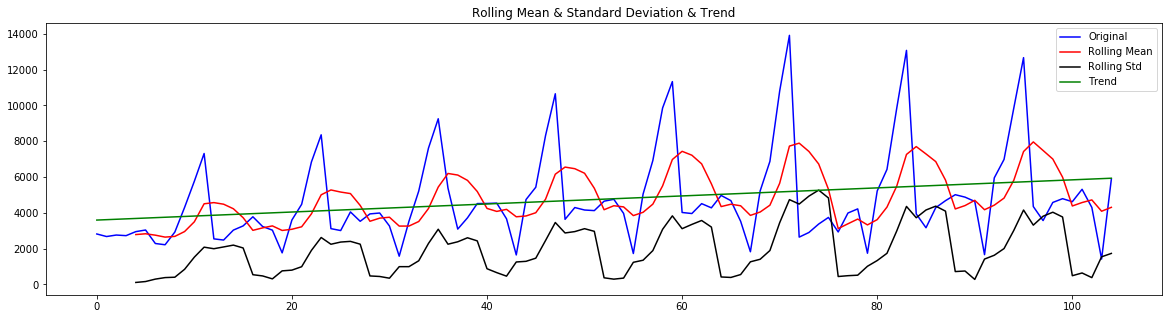

Results of Dickey-Fuller Test:
Test Statistic                 -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


In [798]:
#test_stationarity(TSrev.reset_index().y)
#test_stationarity(TSstock.reset_index().y)

test_stationarity(TSvol.reset_index().y)

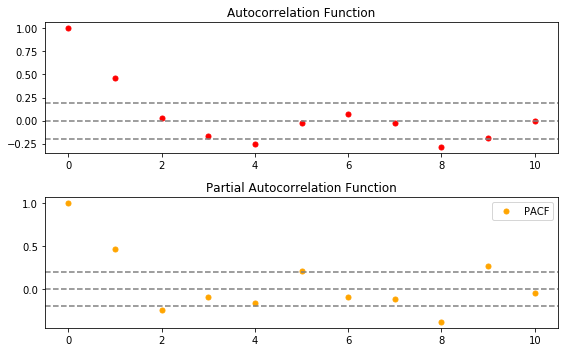

In [959]:
acf_pacf_plot(TSvol, 10)

In [933]:
#Var stab

#TSrev_log = np.log(TSrev+1)
#TSstock_log = np.log(TSstock+1)


plt.plot?

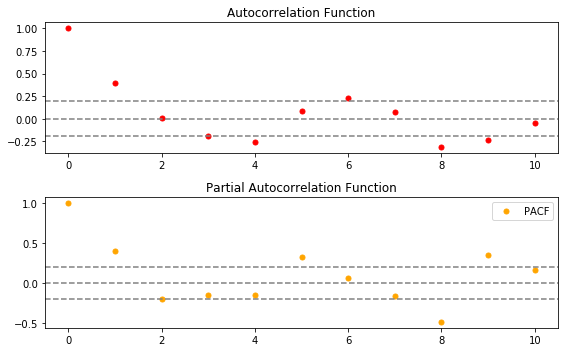

In [1009]:
TSvol_log = np.log(TSvol+1)
acf_pacf_plot(TSvol_log, 10)

In [ ]:
#test_stationarity(TSrev_log.reset_index().y)
#test_stationarity(TSstock_log.reset_index().y)

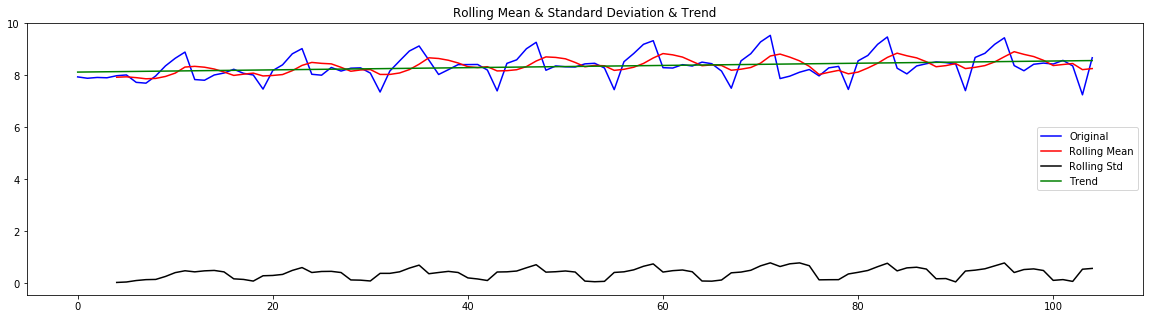

Results of Dickey-Fuller Test:
Test Statistic                 -2.255031
p-value                         0.186882
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [1010]:
test_stationarity(TSvol_log.reset_index().y)

In [1166]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposeAndPlot(timeseries, freq=None):

    if (not freq):
        decomposition = seasonal_decompose(timeseries)
    else :
        decomposition = seasonal_decompose(timeseries, freq)

    trend = decomposition.trend.fillna(method='backfill')
    seasonal = decomposition.seasonal.fillna(method='backfill')
    residual = decomposition.resid.fillna(method='backfill')
    
    recomposed = trend + seasonal + residual

    plt.figure(1, figsize=(20, 5))

    plt.subplot(511)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')

    plt.subplot(512)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')

    plt.subplot(513)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')

    plt.subplot(514)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    
    plt.subplot(515)
    plt.plot(recomposed, label='Recomposed as a phoenix')
    plt.legend(loc='best')

    plt.tight_layout()
    return residual, trend, seasonal

/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


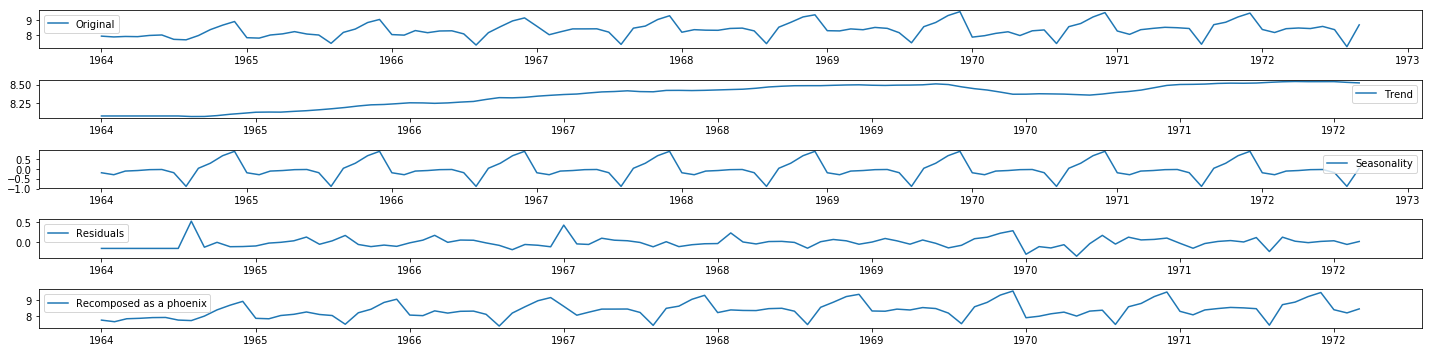

In [1195]:

#decomposeAndPlot(TSstock_log)
#decomposeAndPlot(TSrev_log)

residual_log, trend_log, seasonal_log = decomposeAndPlot(TSvol_log)
residual_log.fillna(method='ffill', inplace=True)
trend_log.fillna(method='ffill', inplace=True)

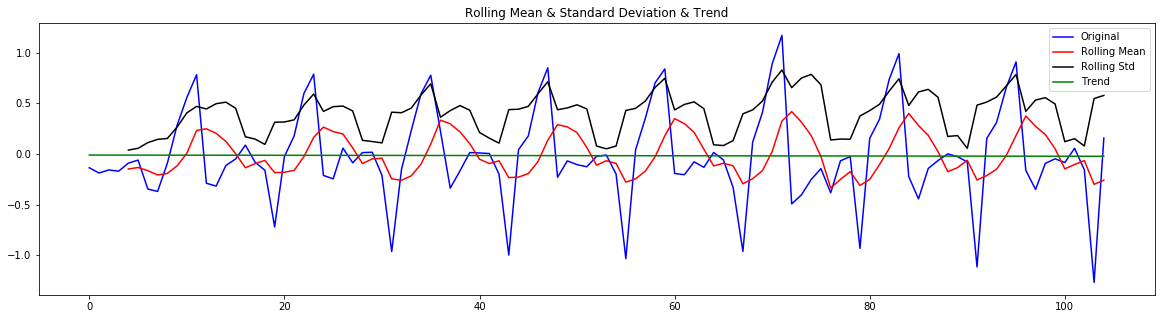

Results of Dickey-Fuller Test:
Test Statistic                 -4.029747
p-value                         0.001263
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


In [1196]:

shift_log = TSvol_log - trend_log
test_stationarity(shift_log.reset_index().y)

In [ ]:
#ARIMA

In [1272]:
#Forcasting - using differencing for high seasonnability
#No strictly stationary series

#Auto-Regressive Integrated Moving Averages

#Param choose by ACF & PACF

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

def acf_pacf_plot(log_series, lags=10):
    lag_acf = acf(log_series, nlags=lags)
    lag_pacf = pacf(log_series, nlags=lags, method='ols')

    plt.figure(1, figsize=(8, 5))

    #Plot ACF: 
    plt.subplot(211) 
    plt.plot(lag_acf, '*', label='ACF', color='red', markersize=5)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-2/np.sqrt(len(log_series)),linestyle='--',color='gray')
    plt.axhline(y=2/np.sqrt(len(log_series)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')

    #Plot PACF:
    plt.subplot(212)
    plt.plot(lag_pacf, '*', label='PACF', color='orange', markersize=5)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-2/np.sqrt(len(log_series)),linestyle='--',color='gray')
    plt.axhline(y=2/np.sqrt(len(log_series)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    
    plt.legend(loc='best')
    plt.show(block=False)



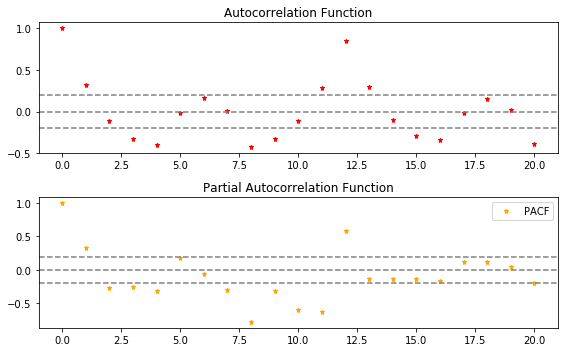

In [1276]:
#acf_pacf_plot(TSrev_log.y, lags=100)
#acf_pacf_plot(TSstock_log.y, 300)

acf_pacf_plot(shift_log, 20)


In [1243]:
#ARIMA model

from statsmodels.tsa.arima_model import ARIMA

def arima_fit_plot(ts_as_df, lag_ar=0, diff_st=0, lag_ma=0, plot=True):
    model = ARIMA(ts_as_df, order=(lag_ar, diff_st, lag_ma))  
    results_AR = model.fit(disp=-1)

    if(plot):
        plt.figure(1, figsize=(20, 5))
        plt.plot(ts_as_df, color='black', label='Actual')
        plt.plot(results_AR.fittedvalues, color='blue', label='Fitted')   
        plt.plot(ts_as_df.y-results_AR.fittedvalues, color='red', label='Error')
        rmse = sqrt(mean_squared_error(ts_as_df.y, results_AR.fittedvalues))
        plt.title('rmse: %.6f'% rmse)
        plt.tight_layout()
        plt.legend(loc='best')
        plt.show(block=False)
    
    
    return results_AR.fittedvalues

In [1244]:
#Residual forecast

def fcat_vs_actual(forecast, actual, trend=None, loga=True, plot=True):
    
    forecast = pd.DataFrame(forecast)
    forecast.columns = ['y']
    
    if(trend is not None):
        if (loga):
            forecast = (np.exp(forecast+trend)-1) 
            actual = np.exp(actual+trend)-1
        else:
            forecast = forecast+trend
            actual = actual+trend   
      
    rmse = sqrt(mean_squared_error(actual, forecast.fillna(method='ffill')))
    if(plot):
        plt.figure(1, figsize=(20, 5))
        plt.plot(actual, color='blue', label = 'Ac')
        plt.plot(forecast, color='red', label = 'Fi')
        plt.title('Ac&Fi rmse: %.6f'% rmse)
        plt.legend(loc='best')
        plt.show(block=False)
    
    return rmse

In [1245]:

def arima_fcast(series, trend=None, lag_ar=0, diff_st=0, lag_ma=0, loga=True, plot=True):
    forecast = arima_fit_plot(series, lag_ar, diff_st, lag_ma, plot)
    rmse_for_origine = fcat_vs_actual(forecast, series, trend, loga, plot)
    return rmse_for_origine
    

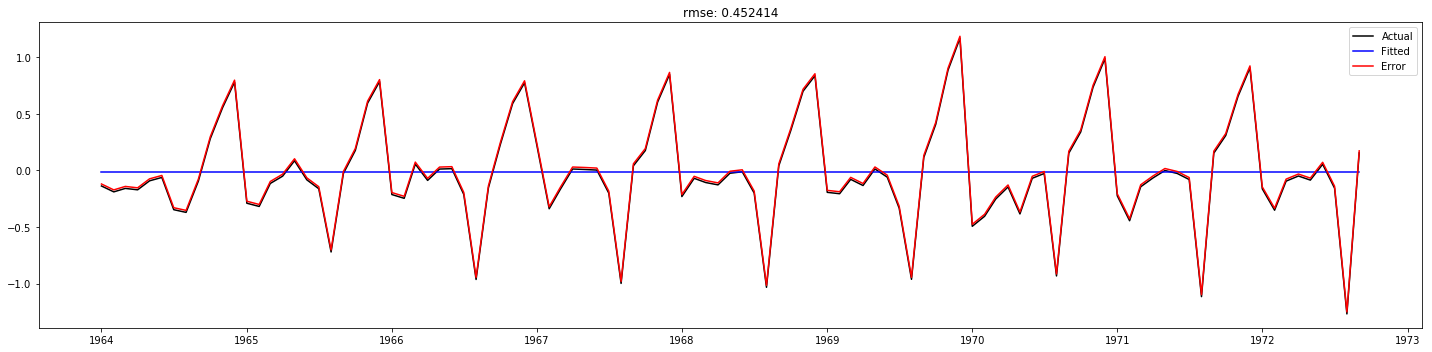

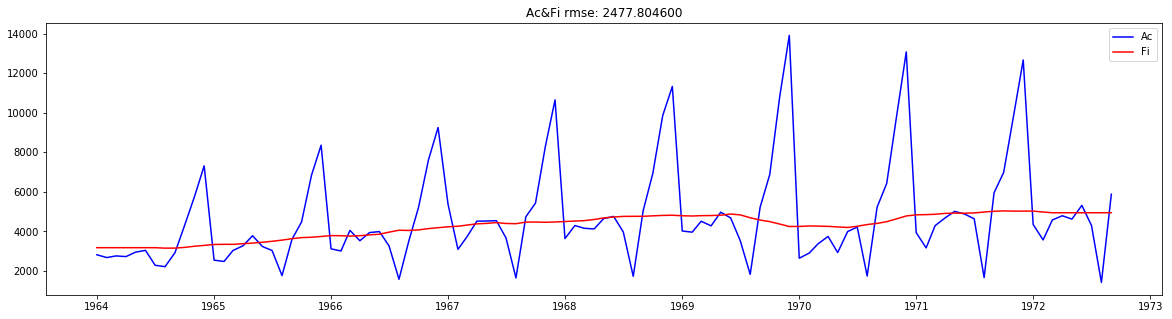

2477.8045997289037

In [1253]:
rmse_ref = arima_fcast(shift_log, trend_log, lag_ar=0, diff_st=0, lag_ma=0)
rmse_ref

/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


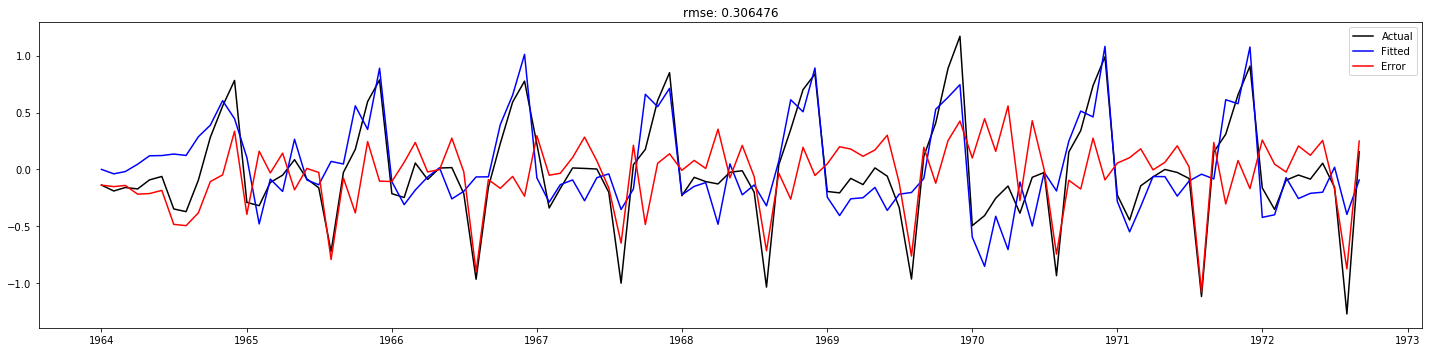

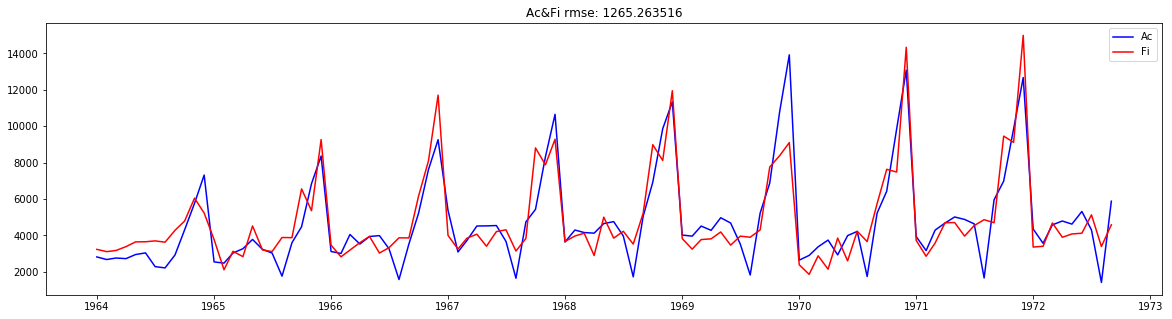

In [1292]:
rmse = arima_fcast(shift_log, trend_log, lag_ar=0, diff_st=0, lag_ma=6)

In [1289]:
AR = [1, 2, 3, 4]
IT = [0]
MA = [1, 2, 3, 4]
rmse_scores = []
step = -1

global_start_time = time.time()  
for lag_ar in AR:
    for diff_st in IT:
        for lag_ma in MA:
            step +=1
            try:
                rmse_orig = arima_fcast(shift_log, trend_log, lag_ar=lag_ar, diff_st=diff_st, 
                                        lag_ma=lag_ma, loga=True, plot=False)
            except:
                pass
            
            rmse_scores.append(rmse_orig)
            print("Iteration number :" + str(step) + ": Loss :" + str(rmse_orig) 
                  + " for : arima_" + str(lag_ar) + "_" + str(diff_st) + "_" + str(lag_ma))
    
print('TRAINING DURATION (s) : ', time.time() - global_start_time)

Iteration number :0: Loss :2168.6515202667633 for : arima_1_0_1
Iteration number :1: Loss :2012.195218242848 for : arima_1_0_2
Iteration number :2: Loss :2008.4641633771614 for : arima_1_0_3


/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iteration number :3: Loss :1563.8149497273787 for : arima_1_0_4
Iteration number :4: Loss :1740.9679754899548 for : arima_2_0_1


/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iteration number :5: Loss :1558.727877796716 for : arima_2_0_2


/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iteration number :6: Loss :1525.7890284743496 for : arima_2_0_3


/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iteration number :7: Loss :1496.7598904927459 for : arima_2_0_4
Iteration number :8: Loss :1673.7745392507486 for : arima_3_0_1
Iteration number :9: Loss :1733.7067636670947 for : arima_3_0_2


/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iteration number :10: Loss :1574.0737177025328 for : arima_3_0_3


/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iteration number :11: Loss :1457.2452540459476 for : arima_3_0_4
Iteration number :12: Loss :1822.6232449494614 for : arima_4_0_1
Iteration number :13: Loss :1816.539533413336 for : arima_4_0_2


/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Iteration number :14: Loss :1278.989741401742 for : arima_4_0_3
Iteration number :15: Loss :1453.7580307222731 for : arima_4_0_4
TRAINING DURATION (s) :  6.674556732177734


/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


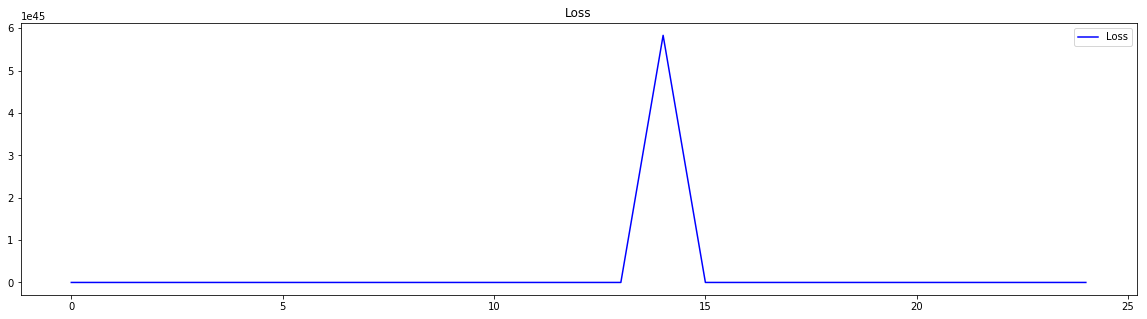

In [1288]:
plt.figure(1, figsize=(20, 5))
#pd.Series(sssss).rolling(window=int(len(AR)*len(MA)/2),center=False).mean()
plt.plot(rmse_scores, color='blue', label = 'Loss')
plt.title('Loss')
plt.legend(loc='best')
plt.show(block=False)

In [1286]:
rmse_scores

[2168.6515202667633,
 2012.195218242848,
 2008.4641633771614,
 1563.8149497273787,
 1424.6755834603289,
 1740.9679754899548,
 1558.727877796716,
 1525.7890284743496,
 1496.7598904927459,
 1367.9810083427512,
 1673.7745392507486,
 1733.7067636670947,
 1574.0737177025328,
 1457.2452540459476,
 5.830251186058037e+45,
 1822.6232449494614,
 1816.539533413336,
 1278.989741401742,
 1453.7580307222731,
 1453.7580307222731,
 1109.8515550626876,
 1141.4177052472833,
 1114.918897477495,
 1114.918897477495,
 1114.918897477495]

/Users/simo-mac/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


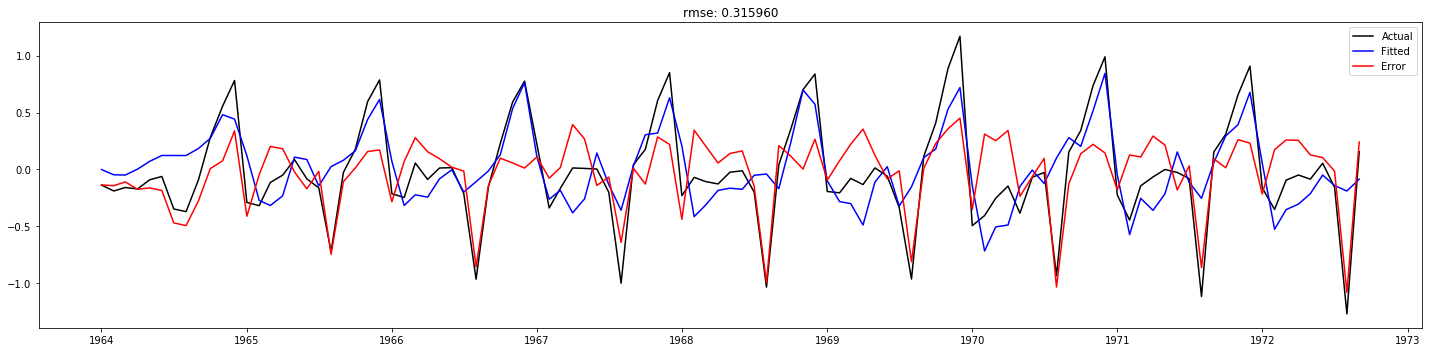

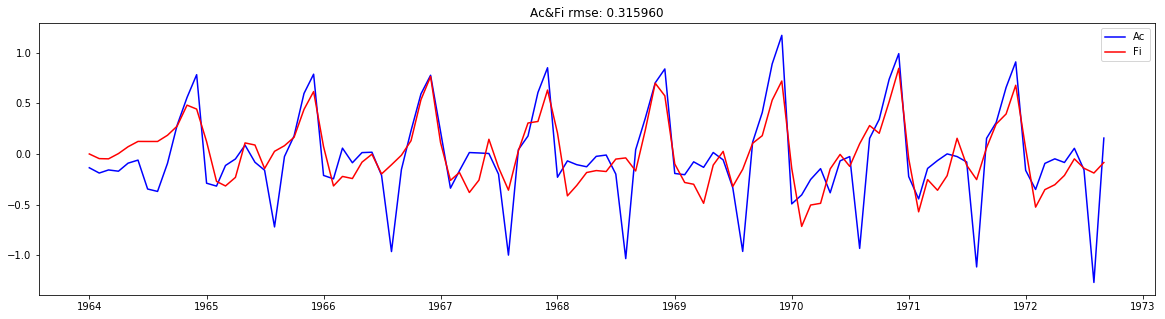

TRAINING DURATION (s) :  1.3760671615600586


In [1277]:
#Better model

global_start_time = time.time() 
arima_fcast(shift_log, lag_ar=4, diff_st=0, lag_ma=3, loga=True, plot=True)
print('TRAINING DURATION (s) : ', time.time() - global_start_time)